## I. Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 2. Data

* the dataset includes data collected from male white-tailed deer from a captive colony at the Kerr Wildlife Management Area.  The dataset includes parentage information, age, birth year, diet type, antler mass, and body mass of male white-tailed deer.

## 3. Goal: assess the influence from mother 'DID', father 'SID', dietary intake 'Energy' where 'S'=standard, 2.65 kcal/g; 'L'=Low, 1.77 kcal/g), birth year 'birthyr', and year data was collected 'yr' on antler size in mature males. 

In [2]:
data = pd.read_csv("Kerr_Data.csv")
data.head()

,SID,DID,ID,Birthyr,Birthyrcat,Energy,yr,age,antler kg,bm kg
0,1210015,2211067,3214093,2014,C,S,2019,5.5,1.3986,106.594120
1,1209009,2211091,3213002,2013,B,S,2017,4.5,1.4362,103.872568
2,1210015,2208035,3214010,2014,C,S,2018,4.5,1.7263,103.872568
3,1210015,2208035,3214010,2014,C,S,2019,5.5,1.4208,103.418976
4,1209058,2210059,3213142,2013,B,S,2017,4.5,1.6368,100.697424


## 4. Data Cleaning

#### 'Birthyrcat' will be dropped since 'Birthyr' is numerical. 'Age' will be dropped because we already know that older deer have larger antlers.

In [3]:
data.drop(['age','Birthyrcat','ID'],axis=1, inplace=True)

In [4]:
data.dtypes

SID            int64
DID            int64
Birthyr        int64
Energy        object
yr             int64
antler kg    float64
bm kg        float64
dtype: object

In [9]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

le = LabelEncoder()
data['Energy'] = le.fit_transform(data['Energy'])
data['antler kg'] = le.fit_transform(data['antler kg'])
data['bm kg'] = le.fit_transform(data['bm kg'])


## 5. Creating the test and train data sets

In [10]:
X = data.drop(['antler kg'], axis=1)
y = data['antler kg']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)

## 5. Modeling

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred_rfc=rfc.predict(X_test)

print(mean_absolute_error(y_test,y_pred_rfc))

34.592592592592595


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingRegressor(random_state = 0)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print(mean_absolute_error(y_test,y_pred_gb))

29.663327831576527


## 6. Ranked Features

In [14]:
feat_importances = pd.DataFrame(gb.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
bm kg,0.562424
DID,0.303165
SID,0.075364
yr,0.042488
Energy,0.013076
Birthyr,0.003482


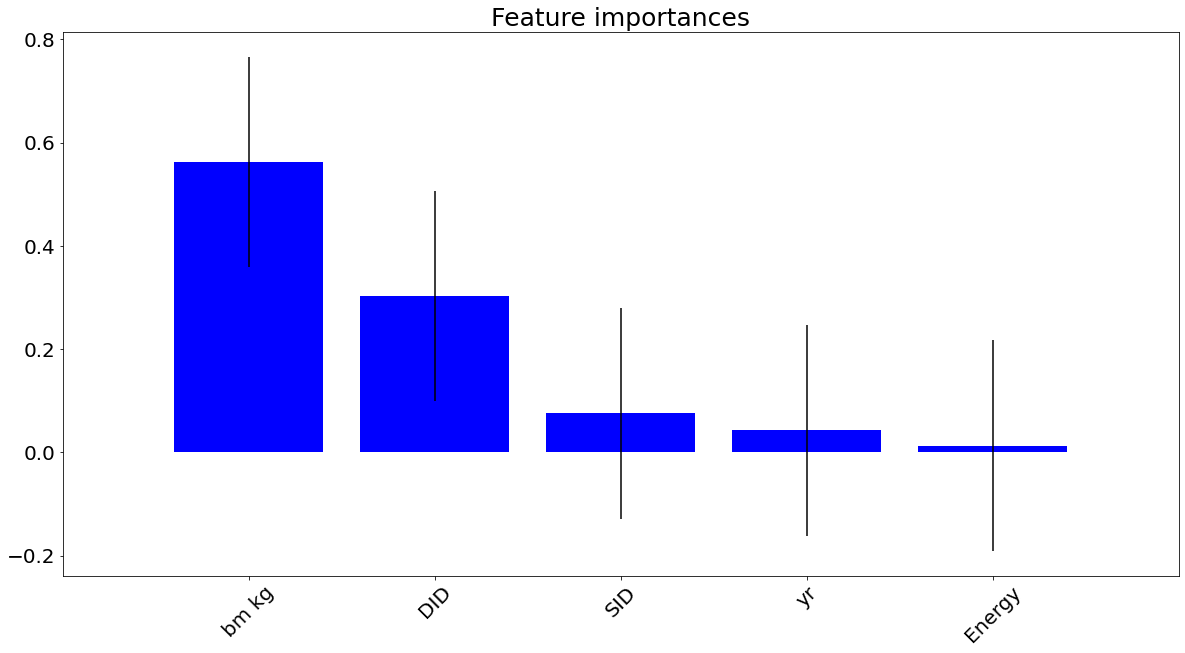

In [15]:
feature_names = [col for col in X_train]
feature_importances = gb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
n = 5 # maximum feature importances displayed
idx = indices[0:n] 
std = np.std(gb.feature_importances_)

plt.figure(figsize=(20, 10))
titlefont = 25
plt.title("Feature importances", fontdict={'fontsize':titlefont})
plt.bar(range(n), feature_importances[idx], color="b", yerr=std, align="center")
xticksize = 20
plt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45, fontdict={'fontsize':xticksize}) 
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xlim([-1, n]) 
plt.show()



## 7. Implications

### Antler size of mature males is most influenced by the body size of the male.  Interestingly, the effects from the mother are also quite influential, whether it be her genetics, nutritional condition, or otherwise. What's most surprising here is that, when it comes to determing antler size of mature males, it didn't really matter whether males had been eating a low or high energy throughout their life.